Dataset Shape:  (20640, 9)

First 5 rows:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


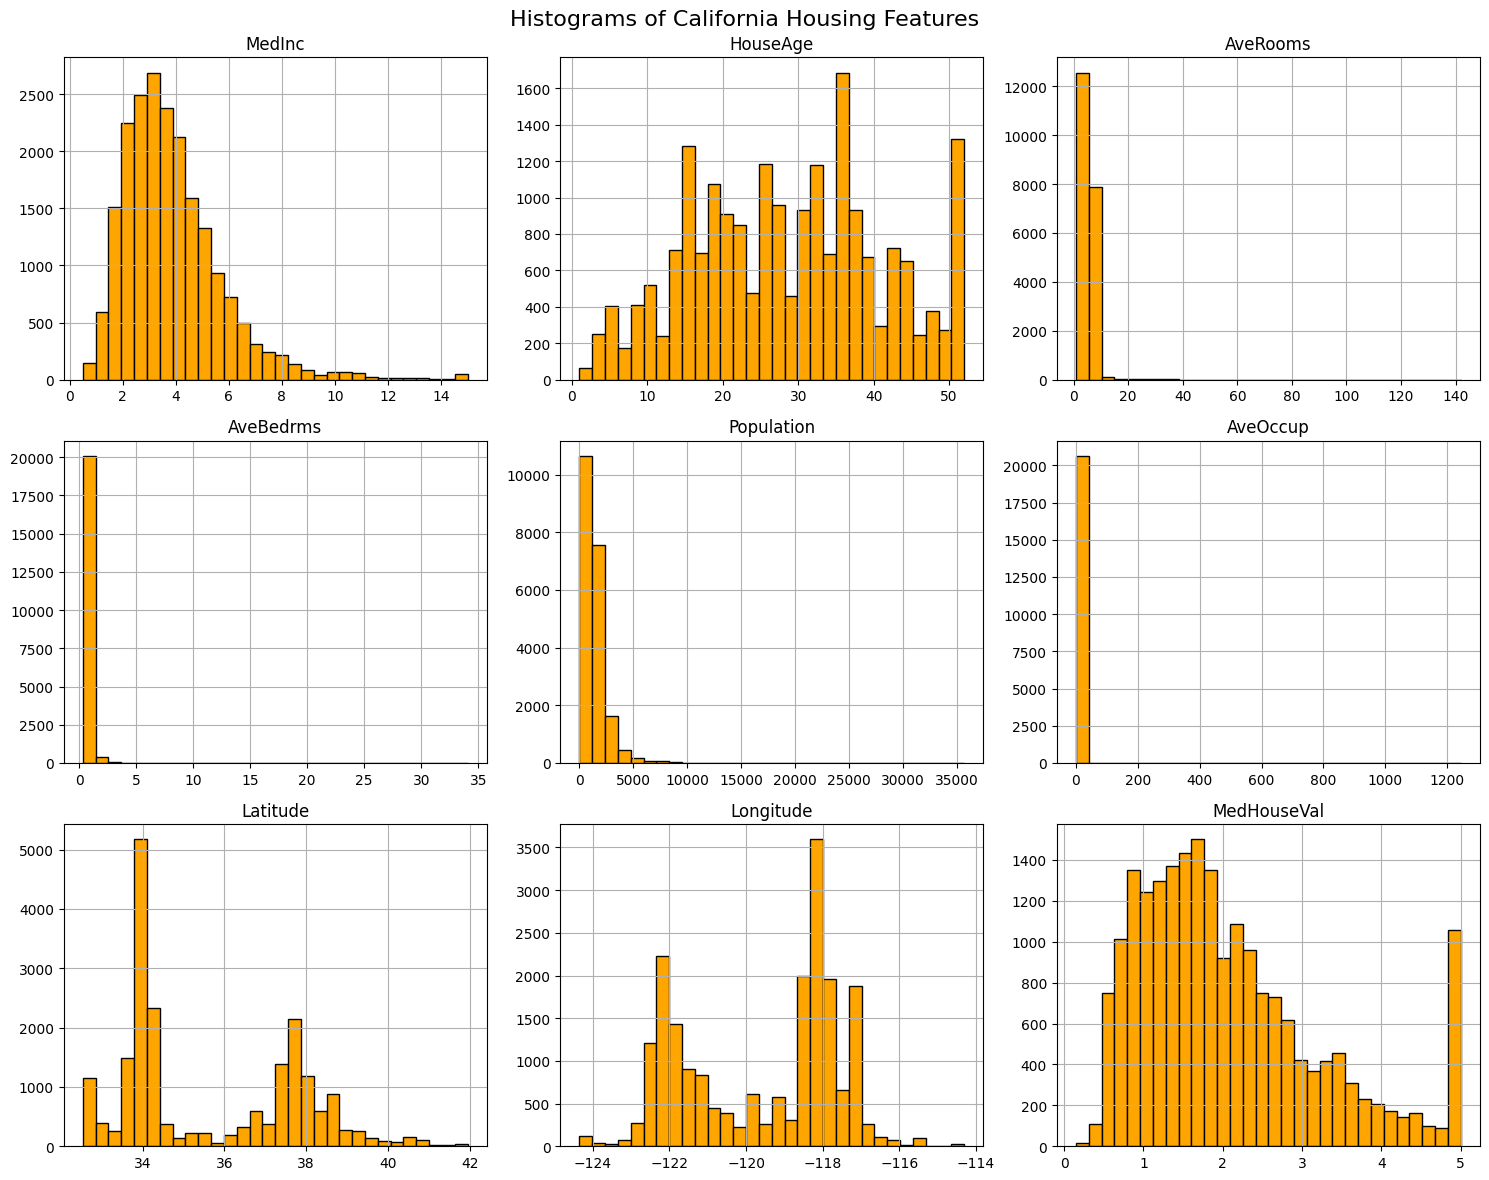

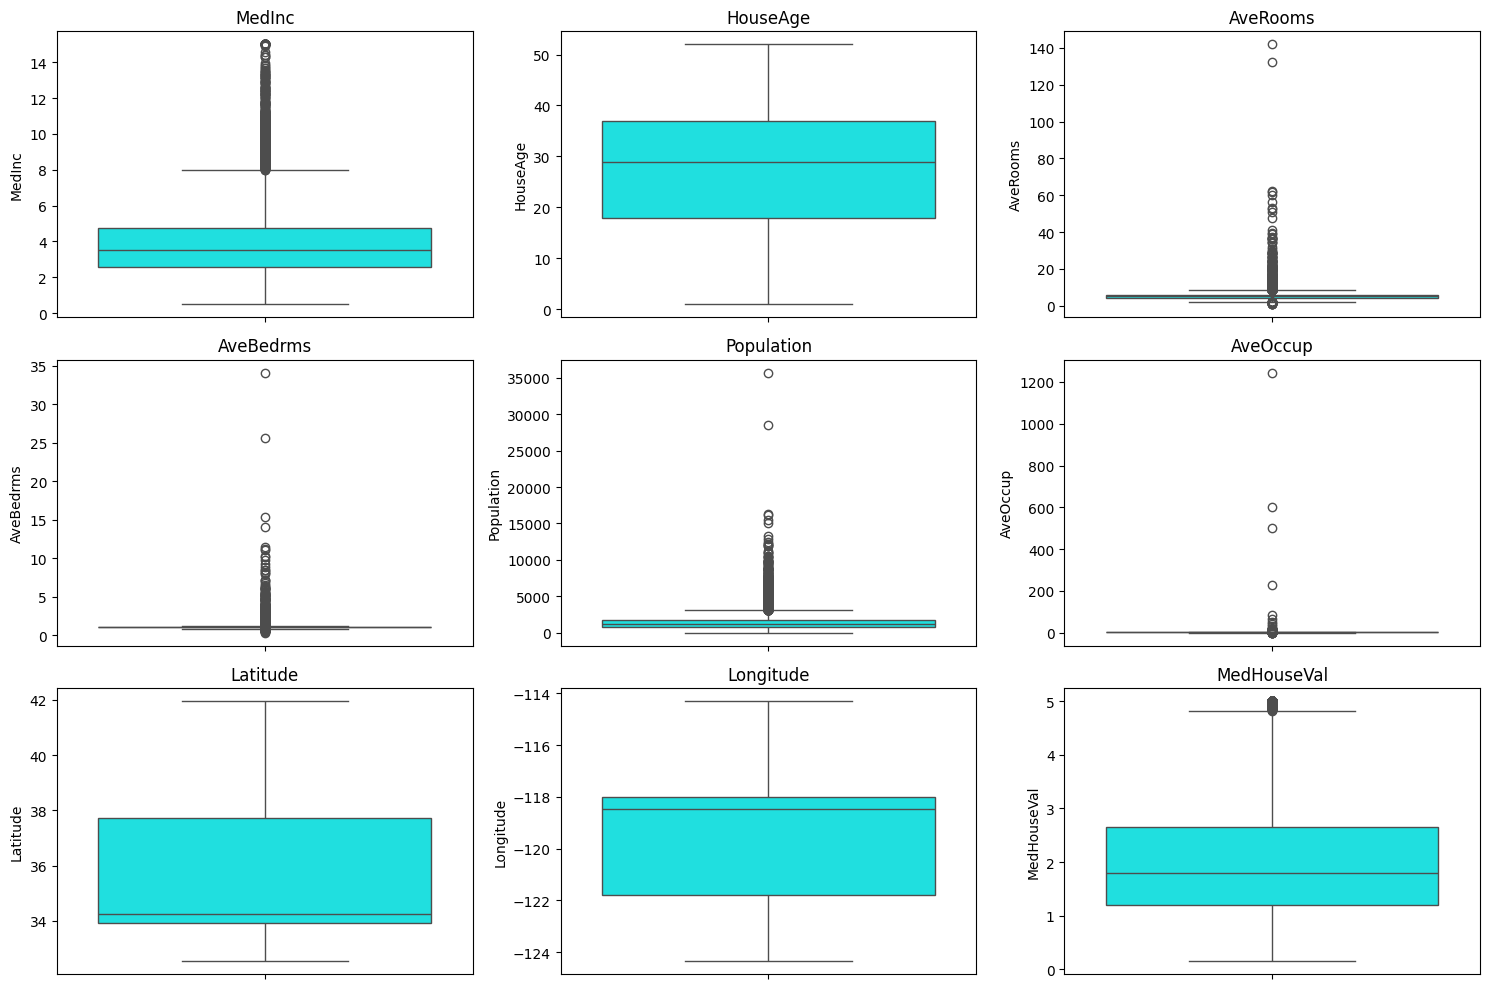


Outlier Summary (using IQR method):

MedInc: 681 outliers
HouseAge: 0 outliers
AveRooms: 511 outliers
AveBedrms: 1424 outliers
Population: 1196 outliers
AveOccup: 711 outliers
Latitude: 0 outliers
Longitude: 0 outliers
MedHouseVal: 1071 outliers


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Load housing dataset
housing = fetch_california_housing()

# Convert to dataframes
df = pd.DataFrame(housing.data, columns = housing.feature_names)

# Define target value
df['MedHouseVal'] = housing.target

print("Dataset Shape: ", df.shape)
print("\nFirst 5 rows:\n", df.head())

# Histograms
df.hist(figsize=(15,12), bins = 30, edgecolor = 'black', color='orange')
plt.suptitle("Histograms of California Housing Features", fontsize=16)
plt.tight_layout()
plt.show()

# Box Plots
plt.figure(figsize=(15,10))

for i, column in enumerate(df.columns, 1):
    plt.subplot(3,3,i)
    sns.boxplot(y=df[column], color='cyan')
    plt.title(column)

plt.tight_layout()
plt.show()

# Identifying outliers using IQR

print("\nOutlier Summary (using IQR method):\n")

for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers")

